Acknowledgement: This code was initially inspired by the lab "COMP34212_Lab2b_Keras_CNN_CIFAR_2025" before undergoing significant changes.

# Setup

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import utils
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout, SpatialDropout2D
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Input, Add
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import Callback, LearningRateScheduler, ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

print('Libraries imported.')

Libraries imported.


# Data Preperation

In [ ]:



cifar100_fine_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

cifar100_coarse_labels = [
    'aquatic mammals', 'fish', 'flowers', 'food containers', 'fruit and vegetables',
    'household electrical devices', 'household furniture', 'insects', 'large carnivores',
    'large man-made outdoor things', 'large natural outdoor scenes', 'large omnivores and herbivores',
    'medium-sized mammals', 'non-insect invertebrates', 'people', 'reptiles', 'small mammals',
    'trees', 'vehicles 1', 'vehicles 2'
]


fine_to_coarse_mapping = {
    0: 4, 1: 1, 2: 14, 3: 8, 4: 0, 5: 6, 6: 7, 7: 7,
    8: 18, 9: 3, 10: 3, 11: 14, 12: 9, 13: 18, 14: 7, 15: 11,
    16: 3, 17: 9, 18: 7, 19: 11, 20: 6, 21: 11, 22: 5, 23: 10,
    24: 7, 25: 6, 26: 13, 27: 15, 28: 3, 29: 15, 30: 0, 31: 11,
    32: 1, 33: 10, 34: 12, 35: 14, 36: 16, 37: 9, 38: 11, 39: 5,
    40: 5, 41: 19, 42: 8, 43: 8, 44: 15, 45: 13, 46: 14, 47: 17,
    48: 18, 49: 10, 50: 16, 51: 4, 52: 17, 53: 4, 54: 2, 55: 0,
    56: 17, 57: 4, 58: 18, 59: 17, 60: 10, 61: 3, 62: 2, 63: 12,
    64: 12, 65: 16, 66: 12, 67: 1, 68: 9, 69: 19, 70: 2, 71: 10,
    72: 0, 73: 1, 74: 16, 75: 12, 76: 9, 77: 13, 78: 15, 79: 13,
    80: 16, 81: 18, 82: 2, 83: 4, 84: 6, 85: 19, 86: 5, 87: 5,
    88: 8, 89: 19, 90: 18, 91: 1, 92: 2, 93: 15, 94: 6, 95: 0,
    96: 17, 97: 8, 98: 14, 99: 13
}

In [ ]:

BATCH_SIZE = 256
N_EPOCH = 165
N_CLASSES = 100
N_SUPERCLASSES = 20
VERBOSE = 1
VALIDATION_SPLIT = 0.2

print('Main variables initialised.')


IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')


Main variables initialised.
Image variables initialisation


In [ ]:

(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar100.load_data(label_mode='fine')
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')


output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES)


input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255


input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Sample input image class: apple


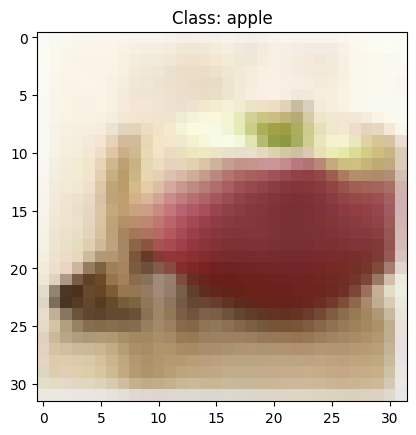

Sample input image class: boy


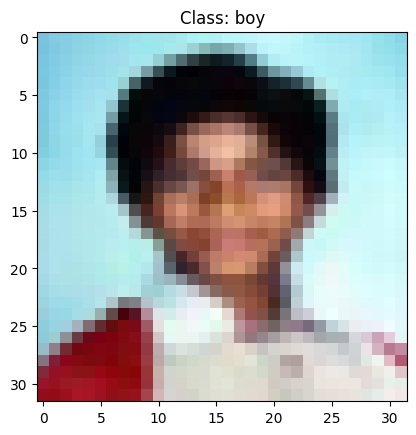

In [ ]:

Selected_Image = 2
image = input_X_train[Selected_Image]
print("Sample input image class:", cifar100_fine_labels[output_y_train[Selected_Image][0]])
plt.imshow(image)
plt.title(f"Class: {cifar100_fine_labels[output_y_train[Selected_Image][0]]}")
plt.show()

Selected_Image = 3
image = input_X_train[Selected_Image]
print("Sample input image class:", cifar100_fine_labels[output_y_train[Selected_Image][0]])
plt.imshow(image)
plt.title(f"Class: {cifar100_fine_labels[output_y_train[Selected_Image][0]]}")
plt.show()

## Data Augmentation

In [ ]:
seed = 42


train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    width_shift_range=0.15,
    height_shift_range=0.15,
    rotation_range=15,
    zoom_range=0.15,
    shear_range=0.15,
    validation_split=VALIDATION_SPLIT
)


validation_datagen = ImageDataGenerator(
    validation_split=VALIDATION_SPLIT
)


train_generator = train_datagen.flow(
    input_X_train,
    output_Y_train,
    batch_size=BATCH_SIZE,
    subset='training',
    shuffle=True,
    seed=seed
)

validation_generator = validation_datagen.flow(
    input_X_train,
    output_Y_train,
    batch_size=BATCH_SIZE,
    subset='validation',
    seed=seed
)



# Training

In [ ]:
def identity_block(x, filters, dropout_rate):
    x_skip = x


    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)


    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)


    x = Add()([x, x_skip])
    x = Activation('relu')(x)
    return x


In [ ]:
def conv_block(x, filters, stride, dropout_rate):
    x_skip = x


    x = Conv2D(filters, 3, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)


    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)


    x_skip = Conv2D(filters, 1, strides=stride, padding='same')(x_skip)
    x_skip = BatchNormalization()(x_skip)

    x = Add()([x, x_skip])
    x = Activation('relu')(x)
    return x


In [ ]:

inputs = Input(shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS))


x = Conv2D(64, 3, strides=1, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)




x = conv_block(x, 64, stride=1, dropout_rate=0.3)
x = identity_block(x, 64, dropout_rate=0.3)


x = conv_block(x, 128, stride=2, dropout_rate=0.3)
x = identity_block(x, 128, dropout_rate=0.3)


x = conv_block(x, 256, stride=2, dropout_rate=0.3)
x = identity_block(x, 256, dropout_rate=0.3)


x = Dropout(0.2)(x)
x = GlobalAveragePooling2D()(x)
outputs = Dense(N_CLASSES, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
class TrainingMonitor(Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = K.get_value(self.model.optimizer.learning_rate)
        print(f"\nEpoch {epoch+1}")
        print(f"LR: {lr:.1e}\n")
        print(f"  Training Loss: {logs['loss']:.4f} - Training Accuracy: {logs['accuracy']:.4f}")
        print(f"  Validation Loss: {logs['val_loss']:.4f} - Validation Accuracy: {logs['val_accuracy']:.4f}")
        if logs['accuracy'] - logs['val_accuracy'] > 0.15:
            print(f"! Overfitting: {logs['accuracy']-logs['val_accuracy']:.4f} gap")



In [ ]:

OPTIM1 = tf.keras.optimizers.AdamW(
    learning_rate=0.001,
    weight_decay=0.01,
    global_clipnorm=1.0,
)

model.compile(loss='categorical_crossentropy', optimizer=OPTIM1, metrics=['accuracy'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_16 (Conv2D)        │ (None, 32, 32, 64)     │          1,792 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_16    │ (None, 32, 32, 64)     │            256 │ conv2d_16[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_13             │ (None, 32, 32, 64)     │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_17 (Conv2D)        │ (None, 32, 32, 64)     │         36,928 │ activation_13[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_17    │ (None, 32, 32, 64)     │            256 │ conv2d_17[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_14             │ (None, 32, 32, 64)     │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_18 (Conv2D)        │ (None, 32, 32, 64)     │         36,928 │ activation_14[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_18    │ (None, 32, 32, 64)     │            256 │ conv2d_18[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_19 (Conv2D)        │ (None, 32, 32, 64)     │          4,160 │ activation_13[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_7 (Dropout)       │ (None, 32, 32, 64)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_19    │ (None, 32, 32, 64)     │            256 │ conv2d_19[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_6 (Add)               │ (None, 32, 32, 64)     │              0 │ dropout_7[0][0],       │
│                           │                        │                │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_15             │ (None, 32, 32, 64)     │              0 │ add_6[0][0]            │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_20 (Conv2D)        │ (None, 32, 32, 64)     │         36,928 │ activation_15[0][0]    │
├──────────────────────

 Total params: 2,811,940 (10.73 MB)

 Trainable params: 2,807,332 (10.71 MB)

 Non-trainable params: 4,608 (18.00 KB)

In [ ]:

early_stop = EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=10,
    restore_best_weights=True,
    start_from_epoch=10
)

In [ ]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=6,
    min_lr=1e-6,
    mode='max',
    cooldown=1,
    verbose=1
)

In [ ]:

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

In [ ]:
history = model.fit(
    train_generator,
    batch_size=BATCH_SIZE,
    epochs=N_EPOCH,
    validation_data=validation_generator,
    verbose=VERBOSE,
    callbacks=[
        early_stop,
        checkpoint,
        TrainingMonitor(),
        reduce_lr,
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.0788 - loss: 4.1408
Epoch 1: val_accuracy improved from -inf to 0.01010, saving model to best_model.h5



Epoch 1
LR: 1.0e-03

  Training Loss: 3.8291 - Training Accuracy: 0.1143
  Validation Loss: 6.8016 - Validation Accuracy: 0.0101
157/157 ━━━━━━━━━━━━━━━━━━━━ 58s 225ms/step - accuracy: 0.0790 - loss: 4.1388 - val_accuracy: 0.0101 - val_loss: 6.8016 - learning_rate: 0.0010
Epoch 2/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.1963 - loss: 3.3146
Epoch 2: val_accuracy improved from 0.01010 to 0.03540, saving model to best_model.h5



Epoch 2
LR: 1.0e-03

  Training Loss: 3.2351 - Training Accuracy: 0.2107
  Validation Loss: 5.4395 - Validation Accuracy: 0.0354
! Overfitting: 0.1753 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 140ms/step - accuracy: 0.1964 - loss: 3.3141 - val_accuracy: 0.0354 - val_loss: 5.4395 - learning_rate: 0.0010
Epoch 3/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.2620 - loss: 2.9566
Epoch 3: val_accuracy improved from 0.03540 to 0.15020, saving model to best_model.h5



Epoch 3
LR: 1.0e-03

  Training Loss: 2.8897 - Training Accuracy: 0.2765
  Validation Loss: 3.7949 - Validation Accuracy: 0.1502
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.2621 - loss: 2.9562 - val_accuracy: 0.1502 - val_loss: 3.7949 - learning_rate: 0.0010
Epoch 4/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.3158 - loss: 2.6544
Epoch 4: val_accuracy improved from 0.15020 to 0.23740, saving model to best_model.h5



Epoch 4
LR: 1.0e-03

  Training Loss: 2.6168 - Training Accuracy: 0.3269
  Validation Loss: 3.1752 - Validation Accuracy: 0.2374
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.3159 - loss: 2.6541 - val_accuracy: 0.2374 - val_loss: 3.1752 - learning_rate: 0.0010
Epoch 5/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.3621 - loss: 2.4457
Epoch 5: val_accuracy improved from 0.23740 to 0.28700, saving model to best_model.h5



Epoch 5
LR: 1.0e-03

  Training Loss: 2.4227 - Training Accuracy: 0.3667
  Validation Loss: 2.9166 - Validation Accuracy: 0.2870
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.3621 - loss: 2.4455 - val_accuracy: 0.2870 - val_loss: 2.9166 - learning_rate: 0.0010
Epoch 6/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.3929 - loss: 2.2921
Epoch 6: val_accuracy did not improve from 0.28700

Epoch 6
LR: 1.0e-03

  Training Loss: 2.2823 - Training Accuracy: 0.3943
  Validation Loss: 4.6462 - Validation Accuracy: 0.1668
! Overfitting: 0.2275 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.3929 - loss: 2.2920 - val_accuracy: 0.1668 - val_loss: 4.6462 - learning_rate: 0.0010
Epoch 7/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.4294 - loss: 2.1308
Epoch 7: val_accuracy improved from 0.28700 to 0.36460, saving model to best_model.h5



Epoch 7
LR: 1.0e-03

  Training Loss: 2.1152 - Training Accuracy: 0.4340
  Validation Loss: 2.6054 - Validation Accuracy: 0.3646
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.4294 - loss: 2.1307 - val_accuracy: 0.3646 - val_loss: 2.6054 - learning_rate: 0.0010
Epoch 8/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.4573 - loss: 2.0005
Epoch 8: val_accuracy improved from 0.36460 to 0.37460, saving model to best_model.h5



Epoch 8
LR: 1.0e-03

  Training Loss: 2.0000 - Training Accuracy: 0.4590
  Validation Loss: 2.5760 - Validation Accuracy: 0.3746
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.4573 - loss: 2.0005 - val_accuracy: 0.3746 - val_loss: 2.5760 - learning_rate: 0.0010
Epoch 9/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.4795 - loss: 1.8916
Epoch 9: val_accuracy did not improve from 0.37460

Epoch 9
LR: 1.0e-03

  Training Loss: 1.8916 - Training Accuracy: 0.4825
  Validation Loss: 2.6547 - Validation Accuracy: 0.3694
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 138ms/step - accuracy: 0.4795 - loss: 1.8916 - val_accuracy: 0.3694 - val_loss: 2.6547 - learning_rate: 0.0010
Epoch 10/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.5012 - loss: 1.7968
Epoch 10: val_accuracy improved from 0.37460 to 0.40210, saving model to best_model.h5



Epoch 10
LR: 1.0e-03

  Training Loss: 1.8030 - Training Accuracy: 0.5027
  Validation Loss: 2.4954 - Validation Accuracy: 0.4021
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.5012 - loss: 1.7969 - val_accuracy: 0.4021 - val_loss: 2.4954 - learning_rate: 0.0010
Epoch 11/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.5310 - loss: 1.6957
Epoch 11: val_accuracy improved from 0.40210 to 0.43750, saving model to best_model.h5



Epoch 11
LR: 1.0e-03

  Training Loss: 1.6989 - Training Accuracy: 0.5290
  Validation Loss: 2.2649 - Validation Accuracy: 0.4375
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 137ms/step - accuracy: 0.5310 - loss: 1.6957 - val_accuracy: 0.4375 - val_loss: 2.2649 - learning_rate: 0.0010
Epoch 12/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.5471 - loss: 1.6114
Epoch 12: val_accuracy did not improve from 0.43750

Epoch 12
LR: 1.0e-03

  Training Loss: 1.6225 - Training Accuracy: 0.5464
  Validation Loss: 2.2976 - Validation Accuracy: 0.4299
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.5471 - loss: 1.6115 - val_accuracy: 0.4299 - val_loss: 2.2976 - learning_rate: 0.0010
Epoch 13/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.5724 - loss: 1.5297
Epoch 13: val_accuracy improved from 0.43750 to 0.46960, saving model to best_model.h5



Epoch 13
LR: 1.0e-03

  Training Loss: 1.5478 - Training Accuracy: 0.5648
  Validation Loss: 2.1846 - Validation Accuracy: 0.4696
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 0.5724 - loss: 1.5299 - val_accuracy: 0.4696 - val_loss: 2.1846 - learning_rate: 0.0010
Epoch 14/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.5848 - loss: 1.4757
Epoch 14: val_accuracy improved from 0.46960 to 0.47380, saving model to best_model.h5



Epoch 14
LR: 1.0e-03

  Training Loss: 1.4852 - Training Accuracy: 0.5824
  Validation Loss: 2.1442 - Validation Accuracy: 0.4738
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.5848 - loss: 1.4758 - val_accuracy: 0.4738 - val_loss: 2.1442 - learning_rate: 0.0010
Epoch 15/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.6027 - loss: 1.3984
Epoch 15: val_accuracy improved from 0.47380 to 0.48730, saving model to best_model.h5



Epoch 15
LR: 1.0e-03

  Training Loss: 1.4269 - Training Accuracy: 0.5950
  Validation Loss: 2.0591 - Validation Accuracy: 0.4873
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 137ms/step - accuracy: 0.6027 - loss: 1.3986 - val_accuracy: 0.4873 - val_loss: 2.0591 - learning_rate: 0.0010
Epoch 16/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.6084 - loss: 1.3566
Epoch 16: val_accuracy did not improve from 0.48730

Epoch 16
LR: 1.0e-03

  Training Loss: 1.3760 - Training Accuracy: 0.6058
  Validation Loss: 3.4738 - Validation Accuracy: 0.3653
! Overfitting: 0.2405 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 140ms/step - accuracy: 0.6084 - loss: 1.3568 - val_accuracy: 0.3653 - val_loss: 3.4738 - learning_rate: 0.0010
Epoch 17/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.6240 - loss: 1.3092
Epoch 17: val_accuracy improved from 0.48730 to 0.52320, saving model to best_model.h5



Epoch 17
LR: 1.0e-03

  Training Loss: 1.3209 - Training Accuracy: 0.6193
  Validation Loss: 1.8492 - Validation Accuracy: 0.5232
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 139ms/step - accuracy: 0.6240 - loss: 1.3093 - val_accuracy: 0.5232 - val_loss: 1.8492 - learning_rate: 0.0010
Epoch 18/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.6383 - loss: 1.2631
Epoch 18: val_accuracy did not improve from 0.52320

Epoch 18
LR: 1.0e-03

  Training Loss: 1.2886 - Training Accuracy: 0.6327
  Validation Loss: 2.3550 - Validation Accuracy: 0.4555
! Overfitting: 0.1772 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.6382 - loss: 1.2633 - val_accuracy: 0.4555 - val_loss: 2.3550 - learning_rate: 0.0010
Epoch 19/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.6474 - loss: 1.2122
Epoch 19: val_accuracy did not improve from 0.52320

Epoch 19
LR: 1.0e-03

  Training Loss: 1.2230 - Training Accuracy: 0.6448
  Validation Loss: 1.9093 - Validation Accuracy: 0.5216
157/157 ━


Epoch 21
LR: 1.0e-03

  Training Loss: 1.1502 - Training Accuracy: 0.6646
  Validation Loss: 2.0042 - Validation Accuracy: 0.5357
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.6735 - loss: 1.1197 - val_accuracy: 0.5357 - val_loss: 2.0042 - learning_rate: 0.0010
Epoch 22/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.6716 - loss: 1.1101
Epoch 22: val_accuracy improved from 0.53570 to 0.59290, saving model to best_model.h5



Epoch 22
LR: 1.0e-03

  Training Loss: 1.1231 - Training Accuracy: 0.6693
  Validation Loss: 1.5511 - Validation Accuracy: 0.5929
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.6715 - loss: 1.1102 - val_accuracy: 0.5929 - val_loss: 1.5511 - learning_rate: 0.0010
Epoch 23/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.6906 - loss: 1.0569
Epoch 23: val_accuracy did not improve from 0.59290

Epoch 23
LR: 1.0e-03

  Training Loss: 1.0764 - Training Accuracy: 0.6851
  Validation Loss: 1.9511 - Validation Accuracy: 0.5389
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 137ms/step - accuracy: 0.6906 - loss: 1.0570 - val_accuracy: 0.5389 - val_loss: 1.9511 - learning_rate: 0.0010
Epoch 24/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.6962 - loss: 1.0230
Epoch 24: val_accuracy did not improve from 0.59290

Epoch 24
LR: 1.0e-03

  Training Loss: 1.0536 - Training Accuracy: 0.6884
  Validation Loss: 1.7172 - Validation Accuracy: 0.5743
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 13


Epoch 29
LR: 5.0e-04

  Training Loss: 0.7757 - Training Accuracy: 0.7696
  Validation Loss: 1.3865 - Validation Accuracy: 0.6448
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.7669 - loss: 0.7859 - val_accuracy: 0.6448 - val_loss: 1.3865 - learning_rate: 5.0000e-04
Epoch 30/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.7852 - loss: 0.7116
Epoch 30: val_accuracy did not improve from 0.64480

Epoch 30
LR: 5.0e-04

  Training Loss: 0.7276 - Training Accuracy: 0.7810
  Validation Loss: 1.4025 - Validation Accuracy: 0.6388
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 139ms/step - accuracy: 0.7852 - loss: 0.7117 - val_accuracy: 0.6388 - val_loss: 1.4025 - learning_rate: 5.0000e-04
Epoch 31/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.7952 - loss: 0.6820
Epoch 31: val_accuracy did not improve from 0.64480

Epoch 31
LR: 5.0e-04

  Training Loss: 0.6997 - Training Accuracy: 0.7893
  Validation Loss: 1.4573 - Validation Accuracy: 0.6390
! Overfitting: 0.1503 gap
1


Epoch 35
LR: 5.0e-04

  Training Loss: 0.6255 - Training Accuracy: 0.8098
  Validation Loss: 1.4738 - Validation Accuracy: 0.6461
! Overfitting: 0.1637 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.8144 - loss: 0.6113 - val_accuracy: 0.6461 - val_loss: 1.4738 - learning_rate: 5.0000e-04
Epoch 36/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.8223 - loss: 0.5905
Epoch 36: val_accuracy did not improve from 0.64610

Epoch 36
LR: 5.0e-04

  Training Loss: 0.6079 - Training Accuracy: 0.8129
  Validation Loss: 1.6143 - Validation Accuracy: 0.6240
! Overfitting: 0.1889 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 138ms/step - accuracy: 0.8222 - loss: 0.5906 - val_accuracy: 0.6240 - val_loss: 1.6143 - learning_rate: 5.0000e-04
Epoch 37/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.8262 - loss: 0.5699
Epoch 37: val_accuracy improved from 0.64610 to 0.65530, saving model to best_model.h5



Epoch 37
LR: 5.0e-04

  Training Loss: 0.5906 - Training Accuracy: 0.8198
  Validation Loss: 1.4047 - Validation Accuracy: 0.6553
! Overfitting: 0.1645 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.8261 - loss: 0.5700 - val_accuracy: 0.6553 - val_loss: 1.4047 - learning_rate: 5.0000e-04
Epoch 38/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.8261 - loss: 0.5605
Epoch 38: val_accuracy did not improve from 0.65530

Epoch 38
LR: 5.0e-04

  Training Loss: 0.5773 - Training Accuracy: 0.8211
  Validation Loss: 1.5766 - Validation Accuracy: 0.6351
! Overfitting: 0.1860 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - accuracy: 0.8261 - loss: 0.5606 - val_accuracy: 0.6351 - val_loss: 1.5766 - learning_rate: 5.0000e-04
Epoch 39/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.8310 - loss: 0.5512
Epoch 39: val_accuracy did not improve from 0.65530

Epoch 39
LR: 5.0e-04

  Training Loss: 0.5684 - Training Accuracy: 0.8236
  Validation Loss: 1.7305 - Val


Epoch 44
LR: 2.5e-04

  Training Loss: 0.4460 - Training Accuracy: 0.8645
  Validation Loss: 1.4361 - Validation Accuracy: 0.6584
! Overfitting: 0.2061 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.8633 - loss: 0.4516 - val_accuracy: 0.6584 - val_loss: 1.4361 - learning_rate: 2.5000e-04
Epoch 45/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.8739 - loss: 0.4144
Epoch 45: val_accuracy did not improve from 0.65840

Epoch 45
LR: 2.5e-04

  Training Loss: 0.4213 - Training Accuracy: 0.8722
  Validation Loss: 1.5060 - Validation Accuracy: 0.6521
! Overfitting: 0.2201 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - accuracy: 0.8739 - loss: 0.4144 - val_accuracy: 0.6521 - val_loss: 1.5060 - learning_rate: 2.5000e-04
Epoch 46/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.8810 - loss: 0.3973
Epoch 46: val_accuracy did not improve from 0.65840

Epoch 46
LR: 2.5e-04

  Training Loss: 0.4049 - Training Accuracy: 0.8782
  Validation Loss: 1.6093 - Val


Epoch 47
LR: 2.5e-04

  Training Loss: 0.4065 - Training Accuracy: 0.8756
  Validation Loss: 1.5149 - Validation Accuracy: 0.6592
! Overfitting: 0.2164 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 142ms/step - accuracy: 0.8769 - loss: 0.4015 - val_accuracy: 0.6592 - val_loss: 1.5149 - learning_rate: 2.5000e-04
Epoch 48/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.8816 - loss: 0.3906
Epoch 48: val_accuracy improved from 0.65920 to 0.66920, saving model to best_model.h5



Epoch 48
LR: 2.5e-04

  Training Loss: 0.3972 - Training Accuracy: 0.8793
  Validation Loss: 1.4494 - Validation Accuracy: 0.6692
! Overfitting: 0.2101 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 139ms/step - accuracy: 0.8816 - loss: 0.3907 - val_accuracy: 0.6692 - val_loss: 1.4494 - learning_rate: 2.5000e-04
Epoch 49/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.8846 - loss: 0.3778
Epoch 49: val_accuracy did not improve from 0.66920

Epoch 49
LR: 2.5e-04

  Training Loss: 0.3904 - Training Accuracy: 0.8801
  Validation Loss: 1.5049 - Validation Accuracy: 0.6653
! Overfitting: 0.2148 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 137ms/step - accuracy: 0.8846 - loss: 0.3779 - val_accuracy: 0.6653 - val_loss: 1.5049 - learning_rate: 2.5000e-04
Epoch 50/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.8906 - loss: 0.3686
Epoch 50: val_accuracy did not improve from 0.66920

Epoch 50
LR: 2.5e-04

  Training Loss: 0.3789 - Training Accuracy: 0.8857
  Validation Loss: 1.6160 - Val


Epoch 57
LR: 1.3e-04

  Training Loss: 0.3042 - Training Accuracy: 0.9099
  Validation Loss: 1.4491 - Validation Accuracy: 0.6708
! Overfitting: 0.2391 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 142ms/step - accuracy: 0.9085 - loss: 0.3029 - val_accuracy: 0.6708 - val_loss: 1.4491 - learning_rate: 1.2500e-04
Epoch 58/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9124 - loss: 0.2964
Epoch 58: val_accuracy did not improve from 0.67080

Epoch 58
LR: 1.3e-04

  Training Loss: 0.2986 - Training Accuracy: 0.9109
  Validation Loss: 1.5012 - Validation Accuracy: 0.6692
! Overfitting: 0.2417 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 137ms/step - accuracy: 0.9124 - loss: 0.2964 - val_accuracy: 0.6692 - val_loss: 1.5012 - learning_rate: 1.2500e-04
Epoch 59/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.9176 - loss: 0.2863
Epoch 59: val_accuracy did not improve from 0.67080

Epoch 59
LR: 1.3e-04

  Training Loss: 0.2943 - Training Accuracy: 0.9139
  Validation Loss: 1.5075 - Val


Epoch 61
LR: 1.3e-04

  Training Loss: 0.2854 - Training Accuracy: 0.9154
  Validation Loss: 1.4660 - Validation Accuracy: 0.6731
! Overfitting: 0.2423 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 137ms/step - accuracy: 0.9161 - loss: 0.2842 - val_accuracy: 0.6731 - val_loss: 1.4660 - learning_rate: 1.2500e-04
Epoch 62/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.9177 - loss: 0.2812
Epoch 62: val_accuracy improved from 0.67310 to 0.67680, saving model to best_model.h5



Epoch 62
LR: 1.3e-04

  Training Loss: 0.2844 - Training Accuracy: 0.9157
  Validation Loss: 1.4553 - Validation Accuracy: 0.6768
! Overfitting: 0.2389 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.9177 - loss: 0.2812 - val_accuracy: 0.6768 - val_loss: 1.4553 - learning_rate: 1.2500e-04
Epoch 63/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9198 - loss: 0.2717
Epoch 63: val_accuracy did not improve from 0.67680

Epoch 63
LR: 1.3e-04

  Training Loss: 0.2799 - Training Accuracy: 0.9168
  Validation Loss: 1.5000 - Validation Accuracy: 0.6691
! Overfitting: 0.2477 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 137ms/step - accuracy: 0.9198 - loss: 0.2718 - val_accuracy: 0.6691 - val_loss: 1.5000 - learning_rate: 1.2500e-04
Epoch 64/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.9210 - loss: 0.2687
Epoch 64: val_accuracy did not improve from 0.67680

Epoch 64
LR: 1.3e-04

  Training Loss: 0.2769 - Training Accuracy: 0.9179
  Validation Loss: 1.5360 - Val


Epoch 70
LR: 6.3e-05

  Training Loss: 0.2417 - Training Accuracy: 0.9311
  Validation Loss: 1.4766 - Validation Accuracy: 0.6780
! Overfitting: 0.2531 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.9322 - loss: 0.2403 - val_accuracy: 0.6780 - val_loss: 1.4766 - learning_rate: 6.2500e-05
Epoch 71/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9279 - loss: 0.2435
Epoch 71: val_accuracy did not improve from 0.67800

Epoch 71
LR: 6.3e-05

  Training Loss: 0.2449 - Training Accuracy: 0.9287
  Validation Loss: 1.5364 - Validation Accuracy: 0.6728
! Overfitting: 0.2559 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 137ms/step - accuracy: 0.9279 - loss: 0.2435 - val_accuracy: 0.6728 - val_loss: 1.5364 - learning_rate: 6.2500e-05
Epoch 72/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.9295 - loss: 0.2417
Epoch 72: val_accuracy did not improve from 0.67800

Epoch 72
LR: 6.3e-05

  Training Loss: 0.2403 - Training Accuracy: 0.9293
  Validation Loss: 1.5388 - Val


Epoch 78
LR: 3.1e-05

  Training Loss: 0.2237 - Training Accuracy: 0.9352
  Validation Loss: 1.5060 - Validation Accuracy: 0.6785
! Overfitting: 0.2567 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 146ms/step - accuracy: 0.9345 - loss: 0.2267 - val_accuracy: 0.6785 - val_loss: 1.5060 - learning_rate: 3.1250e-05
Epoch 79/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.9366 - loss: 0.2207
Epoch 79: val_accuracy did not improve from 0.67850

Epoch 79
LR: 3.1e-05

  Training Loss: 0.2210 - Training Accuracy: 0.9358
  Validation Loss: 1.5098 - Validation Accuracy: 0.6771
! Overfitting: 0.2587 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 138ms/step - accuracy: 0.9366 - loss: 0.2207 - val_accuracy: 0.6771 - val_loss: 1.5098 - learning_rate: 3.1250e-05
Epoch 80/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.9374 - loss: 0.2193
Epoch 80: val_accuracy did not improve from 0.67850

Epoch 80
LR: 3.1e-05

  Training Loss: 0.2215 - Training Accuracy: 0.9361
  Validation Loss: 1.5036 - Val


Epoch 81
LR: 3.1e-05

  Training Loss: 0.2199 - Training Accuracy: 0.9363
  Validation Loss: 1.5253 - Validation Accuracy: 0.6791
! Overfitting: 0.2572 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 0.9363 - loss: 0.2195 - val_accuracy: 0.6791 - val_loss: 1.5253 - learning_rate: 3.1250e-05
Epoch 82/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.9371 - loss: 0.2176
Epoch 82: val_accuracy improved from 0.67910 to 0.67930, saving model to best_model.h5



Epoch 82
LR: 3.1e-05

  Training Loss: 0.2177 - Training Accuracy: 0.9371
  Validation Loss: 1.5029 - Validation Accuracy: 0.6793
! Overfitting: 0.2578 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.9371 - loss: 0.2176 - val_accuracy: 0.6793 - val_loss: 1.5029 - learning_rate: 3.1250e-05
Epoch 83/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.9396 - loss: 0.2122
Epoch 83: val_accuracy did not improve from 0.67930

Epoch 83
LR: 3.1e-05

  Training Loss: 0.2176 - Training Accuracy: 0.9379
  Validation Loss: 1.5146 - Validation Accuracy: 0.6776
! Overfitting: 0.2603 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.9396 - loss: 0.2123 - val_accuracy: 0.6776 - val_loss: 1.5146 - learning_rate: 3.1250e-05
Epoch 84/165
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.9408 - loss: 0.2139
Epoch 84: val_accuracy did not improve from 0.67930

Epoch 84
LR: 3.1e-05

  Training Loss: 0.2160 - Training Accuracy: 0.9395
  Validation Loss: 1.5297 - Val


Epoch 89
LR: 1.6e-05

  Training Loss: 0.2131 - Training Accuracy: 0.9387
  Validation Loss: 1.5226 - Validation Accuracy: 0.6797
! Overfitting: 0.2590 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.9380 - loss: 0.2154 - val_accuracy: 0.6797 - val_loss: 1.5226 - learning_rate: 1.5625e-05
Epoch 90/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.9412 - loss: 0.2058
Epoch 90: val_accuracy did not improve from 0.67970

Epoch 90
LR: 1.6e-05

  Training Loss: 0.2057 - Training Accuracy: 0.9414
  Validation Loss: 1.5212 - Validation Accuracy: 0.6784
! Overfitting: 0.2630 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 0.9412 - loss: 0.2058 - val_accuracy: 0.6784 - val_loss: 1.5212 - learning_rate: 1.5625e-05
Epoch 91/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.9409 - loss: 0.2049
Epoch 91: val_accuracy did not improve from 0.67970

Epoch 91
LR: 1.6e-05

  Training Loss: 0.2050 - Training Accuracy: 0.9415
  Validation Loss: 1.5242 - Val


Epoch 95
LR: 1.6e-05

  Training Loss: 0.2062 - Training Accuracy: 0.9413
  Validation Loss: 1.5237 - Validation Accuracy: 0.6799
! Overfitting: 0.2614 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 140ms/step - accuracy: 0.9395 - loss: 0.2087 - val_accuracy: 0.6799 - val_loss: 1.5237 - learning_rate: 1.5625e-05
Epoch 96/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.9407 - loss: 0.2085
Epoch 96: val_accuracy improved from 0.67990 to 0.68070, saving model to best_model.h5



Epoch 96
LR: 1.6e-05

  Training Loss: 0.2069 - Training Accuracy: 0.9409
  Validation Loss: 1.5117 - Validation Accuracy: 0.6807
! Overfitting: 0.2602 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.9407 - loss: 0.2085 - val_accuracy: 0.6807 - val_loss: 1.5117 - learning_rate: 1.5625e-05
Epoch 97/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.9435 - loss: 0.2018
Epoch 97: val_accuracy did not improve from 0.68070

Epoch 97
LR: 1.6e-05

  Training Loss: 0.2048 - Training Accuracy: 0.9408
  Validation Loss: 1.5284 - Validation Accuracy: 0.6779
! Overfitting: 0.2629 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.9435 - loss: 0.2018 - val_accuracy: 0.6779 - val_loss: 1.5284 - learning_rate: 1.5625e-05
Epoch 98/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.9428 - loss: 0.2029
Epoch 98: val_accuracy improved from 0.68070 to 0.68080, saving model to best_model.h5



Epoch 98
LR: 1.6e-05

  Training Loss: 0.2056 - Training Accuracy: 0.9413
  Validation Loss: 1.5146 - Validation Accuracy: 0.6808
! Overfitting: 0.2605 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.9428 - loss: 0.2029 - val_accuracy: 0.6808 - val_loss: 1.5146 - learning_rate: 1.5625e-05
Epoch 99/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.9409 - loss: 0.2078
Epoch 99: val_accuracy did not improve from 0.68080

Epoch 99
LR: 1.6e-05

  Training Loss: 0.2055 - Training Accuracy: 0.9412
  Validation Loss: 1.5162 - Validation Accuracy: 0.6788
! Overfitting: 0.2624 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 144ms/step - accuracy: 0.9409 - loss: 0.2078 - val_accuracy: 0.6788 - val_loss: 1.5162 - learning_rate: 1.5625e-05
Epoch 100/165
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.9429 - loss: 0.2029
Epoch 100: val_accuracy did not improve from 0.68080

Epoch 100
LR: 1.6e-05

  Training Loss: 0.2044 - Training Accuracy: 0.9425
  Validation Loss: 1.5232 - 

In [ ]:

predictions = model.predict(input_X_test)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(output_Y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


## Evaluation

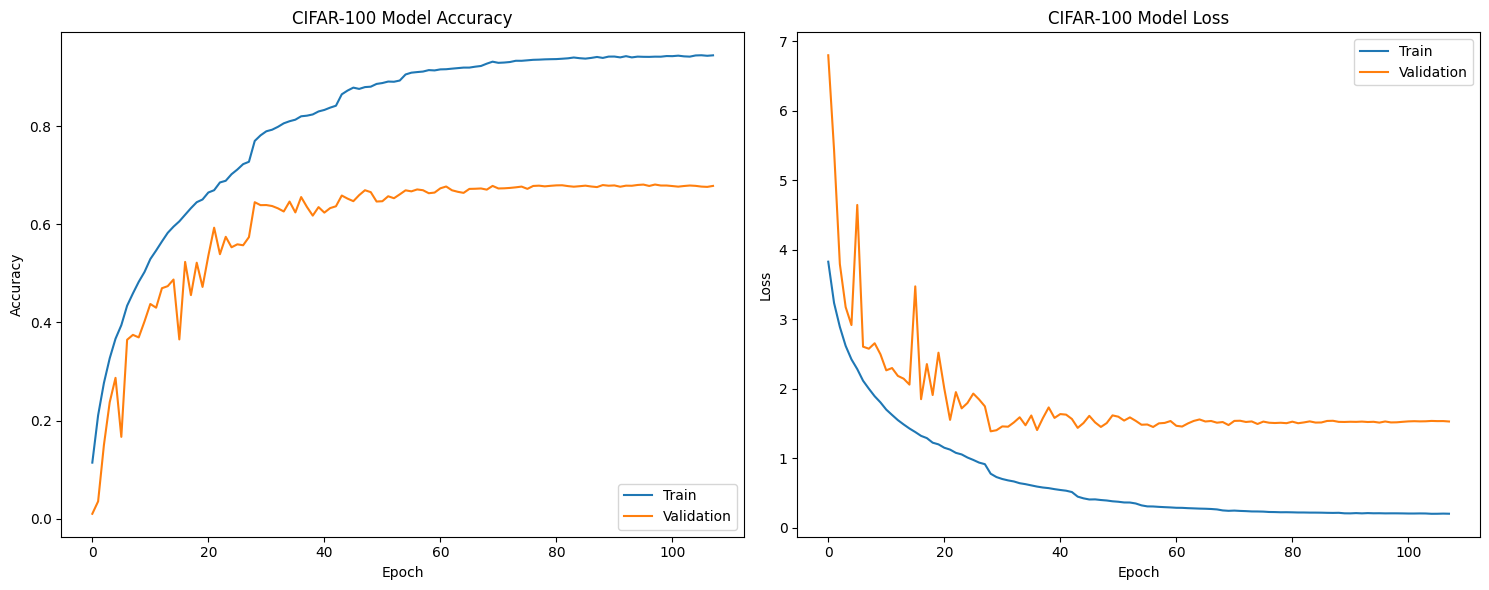

In [ ]:


plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CIFAR-100 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CIFAR-100 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:


test_loss, test_accuracy = model.evaluate(input_X_test, output_Y_test, verbose=VERBOSE)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


superclass_y_true = np.array([fine_to_coarse_mapping[y] for y in y_true])
superclass_y_pred = np.array([fine_to_coarse_mapping[y] for y in y_pred])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6671 - loss: 1.6055

Test Loss: 1.5524
Test Accuracy: 0.6713


In [ ]:


precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred, average=None, zero_division=0)


superclass_precision, superclass_recall, superclass_f1, superclass_support = precision_recall_fscore_support(
    superclass_y_true, superclass_y_pred, average=None, labels=range(N_SUPERCLASSES), zero_division=0
)


class_metrics_df = pd.DataFrame({
    'Class': cifar100_fine_labels,
    'Superclass': [cifar100_coarse_labels[fine_to_coarse_mapping[i]] for i in range(len(cifar100_fine_labels))],
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
})


superclass_metrics_df = pd.DataFrame({
    'Superclass': cifar100_coarse_labels,
    'Precision': superclass_precision,
    'Recall': superclass_recall,
    'F1-Score': superclass_f1,
    'Support': superclass_support
})


macro_precision = np.mean(precision)
macro_recall = np.mean(recall)
macro_f1 = np.mean(f1)

print("\n=== Macro-averaged Metrics ===")
print(f"Precision: {macro_precision:.4f}")
print(f"Recall: {macro_recall:.4f}")
print(f"F1-Score: {macro_f1:.4f}")


=== Macro-averaged Metrics ===
Precision: 0.6801
Recall: 0.6713
F1-Score: 0.6688


In [ ]:

print("\n=== Superclass Performance ===")
print(superclass_metrics_df.sort_values(by='F1-Score', ascending=False))


=== Superclass Performance ===
                        Superclass  Precision  Recall  F1-Score  Support
17                           trees   0.925466  0.8940  0.909461      500
2                          flowers   0.928726  0.8600  0.893043      500
14                          people   0.901468  0.8600  0.880246      500
10    large natural outdoor scenes   0.874751  0.8800  0.877368      500
9    large man-made outdoor things   0.832103  0.9020  0.865643      500
18                      vehicles 1   0.835681  0.8900  0.861985      600
6              household furniture   0.846602  0.8720  0.859113      500
4             fruit and vegetables   0.822736  0.8540  0.838077      500
19                      vehicles 2   0.811905  0.8525  0.831707      400
7                          insects   0.772556  0.8220  0.796512      500
3                  food containers   0.788000  0.7880  0.788000      500
11  large omnivores and herbivores   0.801354  0.7100  0.752916      500
5     household ele

In [ ]:


def find_most_confused_pairs(y_true, y_pred, class_names, top_n=10):
    cm = confusion_matrix(y_true, y_pred)
    np.fill_diagonal(cm, 0)


    confused_pairs = []
    flat_indices = np.argsort(cm.flatten())[::-1][:top_n]

    for idx in flat_indices:
        i, j = np.unravel_index(idx, cm.shape)
        confused_pairs.append((class_names[i], class_names[j], cm[i, j]))

    return confused_pairs


print("\n=== Top 10 Most Confused Class Pairs ===")
confused_pairs = find_most_confused_pairs(y_true, y_pred, cifar100_fine_labels, top_n=10)
for true_class, pred_class, count in confused_pairs:
    print(f"True: {true_class}, Predicted: {pred_class}, Count: {count}")


print("\n=== Top 5 Most Confused Superclass Pairs ===")
confused_superclass_pairs = find_most_confused_pairs(superclass_y_true, superclass_y_pred,
                                                     cifar100_coarse_labels, top_n=5)
for true_class, pred_class, count in confused_superclass_pairs:
    print(f"True: {true_class}, Predicted: {pred_class}, Count: {count}")


=== Top 10 Most Confused Class Pairs ===
True: girl, Predicted: woman, Count: 22
True: oak_tree, Predicted: maple_tree, Count: 20
True: girl, Predicted: boy, Count: 20
True: pine_tree, Predicted: oak_tree, Count: 20
True: maple_tree, Predicted: oak_tree, Count: 18
True: willow_tree, Predicted: oak_tree, Count: 17
True: man, Predicted: boy, Count: 15
True: bus, Predicted: streetcar, Count: 15
True: boy, Predicted: man, Count: 15
True: dolphin, Predicted: whale, Count: 15

=== Top 5 Most Confused Superclass Pairs ===
True: food containers, Predicted: household electrical devices, Count: 54
True: reptiles, Predicted: non-insect invertebrates, Count: 49
True: small mammals, Predicted: medium-sized mammals, Count: 43
True: medium-sized mammals, Predicted: large carnivores, Count: 42
True: non-insect invertebrates, Predicted: reptiles, Count: 37
